# Log AUC

First import modules

In [90]:
import numpy as np
import math

import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

Then test AUC

In [148]:
"""Test roc_curves and auc"""
yScores = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.53, 0.52, 0.51, 0.505, 0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.30, 0.1])
yLabels = np.array([1,1,0, 1, 1, 1, 0, 0, 1, 0, 1,0, 1, 0, 0, 0, 1 , 0, 1, 0])

fpr, tpr, thresholds = roc_curve(yLabels, yScores)
roc_auc = auc(fpr, tpr)

print(f"roc_auc:{roc_auc}")

roc_auc:0.68


## Define logauc

The formula for $\mathrm{LogAUC}_\lambda$ is:
\begin{equation*}
\mathrm{LogAUC}_\lambda=\frac{\displaystyle \sum_{i}^{where~x_i\ge\lambda} (\log_{10} x_{i+1} - \log_{10} x_i)(\frac{y_{i+1}+y_i}{2})}{\log_{10}\frac{1}{\lambda}}
\end{equation*}

The (adjusted) $\textrm{logAUC}$:
\begin{equation*} 
\textrm{LogAUC}=\textrm{LogAUC}_{0.001}-0.14462
\end{equation*}

In [159]:
"""Log auc curves"""
def logauc(yLabels, yScores, lambda0 = 0.001):
    """
    Izzy's
    ~izharw/repos/scripts/getAUC.py
    background here if it's useful: http://wiki.bkslab.org/index.php/LogAUC
    Refactored code
    """
    fpr, tpr, thresholds = roc_curve(yLabels, score)
    logauc = 0
    for i in range(len(target)):
        if fpr[i]>lambda0:
            break
    logroc = ( np.log10(fpr[i+1:]) - np.log10(fpr[i:-1]) ) * ( tpr[i+1:] + tpr[i:-1] ) / (2*np.log10(1/lambda0))
    return np.sum(logroc) - 0.14462

def logauc1(fpr, tpr, lambda0 = 0.001):
    """
    Izzy's
    ~izharw/repos/scripts/getAUC.py
    background here if it's useful: http://wiki.bkslab.org/index.php/LogAUC
    Refactored code
    """
    for i in range(len(fpr)):
        if fpr[i]<lambda0:
            fpr[i]=lambda0
    logroc = ( np.log10(fpr[1:]) - np.log10(fpr[:-1]) ) * ( tpr[1:] + tpr[:-1] ) / (2*np.log10(1/lambda0))
    return np.sum(logroc) - 0.14462

###
print(logauc1(fpr,tpr,lambda0=0.001))
print(logauc1(fpr,tpr,lambda0=0.0001))

0.85538
0.60538


## Define plot curves

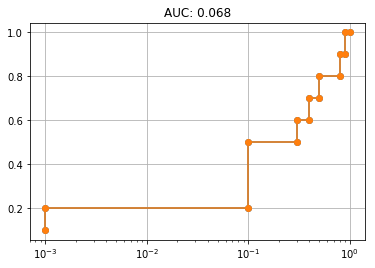

In [154]:
"""Plot curves"""
def plot_roc_curve(fpr, tpr):
    x=fpr
    y=tpr
    auc0=auc(fpr,tpr)
    plt.title(f'AUC: {round(auc0,3)}')
    plt.grid(True)
    plt.plot(x,y, marker='o')
    #plt.show() 
    
def plot_logroc_curve(fpr, tpr, lambda0=0.001):
    x=fpr
    x[x<lambda0]=lambda0
    y=tpr
    auc=logauc1(fpr,tpr)
    plt.title(f'AUC: {round(auc,3)}')
    plt.xscale('log')
    plt.grid(True)
    plt.plot(x,y, marker='o')
    #plt.show() 

plot_roc_curve(fpr,tpr)
plot_logroc_curve(fpr,tpr)

## Testing everything

0.0
Shift0: 0.0 - auc: 0.44200000000000006 - logauc: -0.015
0.2
Shift0: 0.2 - auc: 0.7065300000000001 - logauc: 0.245
0.5
Shift0: 0.5 - auc: 0.86005 - logauc: 0.43
1.0
Shift0: 1.0 - auc: 0.999 - logauc: 0.855


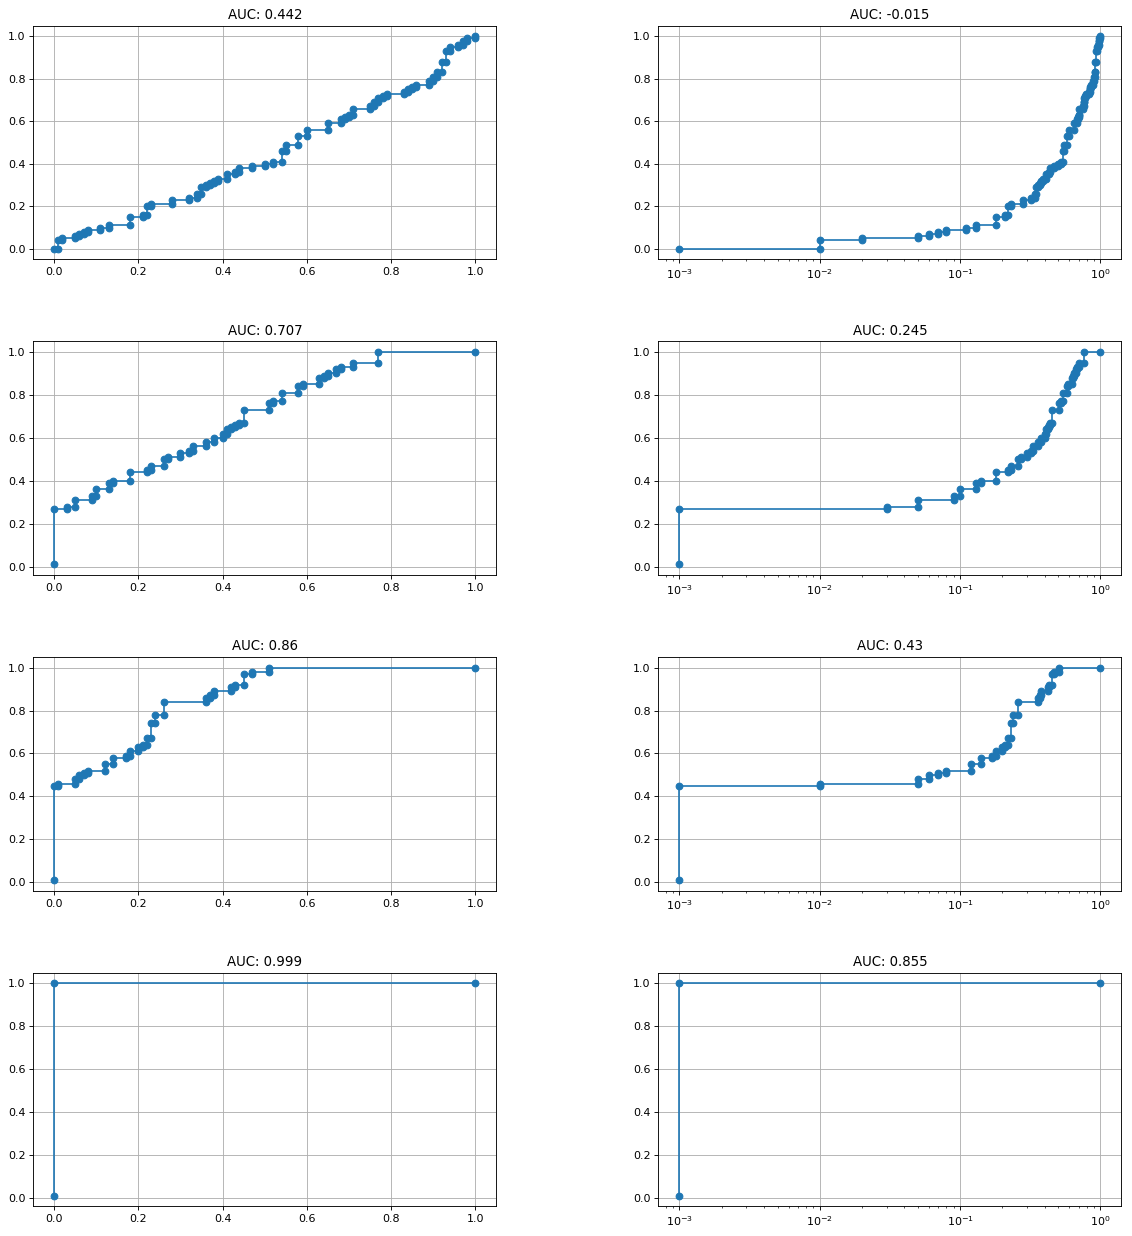

In [167]:
%matplotlib inline

# plot with various axes scales
plt.figure(1)
fig=plt.figure(figsize=(16, 18), dpi= 80, facecolor='w', edgecolor='k')
plt.subplots_adjust(top=0.92, bottom=0.1, left=0.10, right=0.95, hspace=0.35, wspace=0.35)

subplot0=0
np.random.seed(0)

n_pos=100
n_neg=100

for shift0 in [0.0,0.2,0.5,1.0]:
    y=np.append(np.ones(n_pos),np.zeros(n_neg))
    x=np.append(np.random.random(n_pos)+shift0, np.random.random(n_neg))
    print(shift0)
    fpr, tpr, thresholds = roc_curve(y, x)
    logauc0 = logauc1(fpr, tpr)
    auc0 = auc(fpr,tpr)
    print(f"Shift0: {shift0} - auc: {auc0} - logauc: {round(logauc0,3)}")
    # linear
    subplot0 += 1
    plt.subplot(4,2,subplot0)
    plot_roc_curve(fpr,tpr)

    subplot0 += 1
    plt.subplot(4,2,subplot0)
    plot_logroc_curve(fpr,tpr)

In [160]:
np.random.seed(0)

n_pos=100
n_neg=100

for shift0 in [0.0,0.2,0.5,1.0]:
    roc_auc1=[]
    log_auc1=[]
    for i in range(3):
        y=np.append(np.ones(n_pos),np.zeros(n_neg))
        x=np.append(np.random.random(n_pos)+shift0, np.random.random(n_neg))
        fpr, tpr, thresholds = roc_curve(y, x)
        rocauc0 = auc(fpr,tpr)
        logauc0 = logauc1(fpr, tpr)
        #logauc0 = 1.0
        #print(f"Shift0: {shift0} - auc: {auc0} - logauc: {round(logauc0,3)}")
        roc_auc1.append(rocauc0)
        log_auc1.append(logauc0)
    rocauc2=round(np.mean(roc_auc1),3)
    logauc2=round(np.mean(log_auc1),3)
    print(f"Shift0: {shift0} - rocauc: {rocauc2} - logauc: {logauc2}")
    print(f"Shift0: {shift0} - rocauc: {np.round(roc_auc1, 3)}")
    print(f"Shift0: {shift0} - logauc: {np.round(log_auc1, 3)}")
        

Shift0: 0.0 - rocauc: 0.491 - logauc: 0.017
Shift0: 0.0 - rocauc: [ 0.442  0.536  0.494]
Shift0: 0.0 - logauc: [-0.015  0.055  0.01 ]
Shift0: 0.2 - rocauc: 0.686 - logauc: 0.185
Shift0: 0.2 - rocauc: [ 0.699  0.713  0.646]
Shift0: 0.2 - logauc: [ 0.168  0.216  0.171]
Shift0: 0.5 - rocauc: 0.852 - logauc: 0.471
Shift0: 0.5 - rocauc: [ 0.847  0.834  0.877]
Shift0: 0.5 - logauc: [ 0.482  0.436  0.494]
Shift0: 1.0 - rocauc: 1.0 - logauc: 0.855
Shift0: 1.0 - rocauc: [ 1.  1.  1.]
Shift0: 1.0 - logauc: [ 0.855  0.855  0.855]


array([ 0. ,  0. ,  0.1,  0.1,  0.3,  0.3,  0.4,  0.4,  0.5,  0.5,  0.8,
        0.8,  0.9,  0.9,  1. ])